**NGUYỄN HỮU THUẬN 19146400**


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FACE1/train/train',target_size=(150,150),
                                        batch_size=3,class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FACE1/train/validation',target_size=(150,150),
                                        batch_size=3,class_mode='categorical')

Found 123 images belonging to 2 classes.
Found 123 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'KHONGPHAITHUAN': 0, 'THUAN': 1}

In [ ]:
train_dataset = np_utils.to_categorical(train_dataset,2)
validation_dataset = np_utils.to_categorical(validation_dataset,2)


In [ ]:
#tạo model
model = Sequential()
model=Sequential()
model.add(Dense(256,activation='relu',input_shape=(150,150,3)))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 150, 150, 256)     1024      
                                                                 
 dense_16 (Dense)            (None, 150, 150, 512)     131584    
                                                                 
 dropout_7 (Dropout)         (None, 150, 150, 512)     0         
                                                                 
 dense_17 (Dense)            (None, 150, 150, 1)       513       
                                                                 
Total params: 133,121
Trainable params: 133,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#tao modle
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=["accuracy"])
from keras.callbacks import EarlyStopping
 
#train 
history = model.fit(train_dataset,epochs=20,
                    validation_data = validation_dataset,
                    callbacks=[EarlyStopping(monitor='val_loss',patience=10)], verbose=1)      

In [ ]:
model.save('ANNFace1_Recognition.h5')

In [ ]:
# ve do thi
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
pip install MTCNN

{'box': [117, 198, 168, 208], 'confidence': 0.9999997615814209, 'keypoints': {'left_eye': (192, 274), 'right_eye': (265, 272), 'nose': (246, 313), 'mouth_left': (204, 360), 'mouth_right': (261, 358)}}


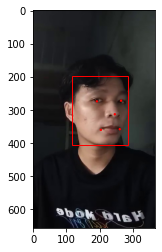

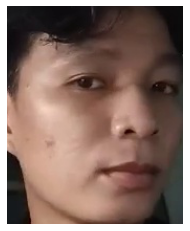

0
đây không phải THUẬN
{'box': [113, 239, 229, 315], 'confidence': 0.9999463558197021, 'keypoints': {'left_eye': (180, 365), 'right_eye': (286, 365), 'nose': (235, 428), 'mouth_left': (190, 483), 'mouth_right': (280, 485)}}


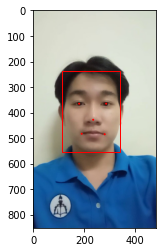

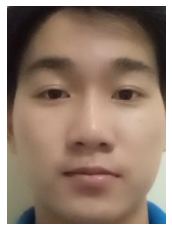

1
đây là THUẬN


In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/FACE1/test/khongphaithuan/phong_03.jpg'
img_path1 = '/content/drive/MyDrive/Colab Notebooks/FACE1/test/thuan/thuan_03.jpg'

img=load_img(img_path,target_size=(150,150))
img1=load_img(img_path1,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

plt.imshow(img1)
img1=img_to_array(img1)
img1=img1.reshape(1,150,150,3)
img1=img1.astype('float32')
img1=img1/255

convat1=np.argmax(model.predict(img1),axis=1)
pred1 = model.predict(img1)

convat=np.argmax(model.predict(img),axis=1)
pred = model.predict(img)
classes = ['đây không phải THUẬN','đây là THUẬN']

from typing import KeysView
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename=img_path
pixel=plt.imread(filename)
detector=MTCNN()
faces=detector.detect_faces(pixel)
data=plt.imread(filename)
plt.imshow(data)
ax=plt.gca()

for face in faces:
  print(face)
#danh khuon mat nguoi(dectect)
for face in faces:
  x,y, width,height=face['box']
  rect=plt.Rectangle((x,y),width,height,
                     fill=False,color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot=plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.show()

#cat anh cac khuon mat nhan dang trong anh
def draw_faces (filename,result_list):
  data=plt.imread(filename)
  for i in range (len(result_list)):
    x1,y1,widht,height=result_list[i]['box']
    x2,y2=x1+widht,y1+height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
  plt.show()
filename=img_path
pixel=plt.imread(filename)
detector=MTCNN()
faces=detector.detect_faces(pixel)
draw_faces(filename,faces)
print(np.argmax(pred))
if convat==0:
  print(classes[0])
else: print(classes[1])

filename1=img_path1
pixel1=plt.imread(filename1)
detector1=MTCNN()
faces1=detector1.detect_faces(pixel1)
data1=plt.imread(filename1)
plt.imshow(data1)
ax1=plt.gca()
for face in faces1:
  print(face)
#danh khuon mat nguoi(dectect)
for face in faces1:
  x,y, width,height=face['box']
  rect1=plt.Rectangle((x,y),width,height,
                     fill=False,color='red')
  ax1.add_patch(rect1)
  for key,value in face['keypoints'].items():
    dot1=plt.Circle(value,radius=2,color='red')
    ax1.add_patch(dot1)
plt.show()

#cat anh cac khuon mat nhan dang trong anh
def draw_faces (filename1,result_list):
  data=plt.imread(filename1)
  for i in range (len(result_list)):
    x1,y1,widht,height=result_list[i]['box']
    x2,y2=x1+widht,y1+height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
  plt.show()



filename1=img_path1
pixel=plt.imread(filename1)
detector1=MTCNN()
faces1=detector.detect_faces(pixel1)
draw_faces(filename1,faces1)


print(np.argmax(pred1))
if convat1==0:
  print(classes[0])
else: print(classes[1])

**DU LIEU**
[Data](https://drive.google.com/drive/folders/1YLYUxuCTxwLLbfL4RvkIcaTHy06ipAz2?usp=sharing)